# Réseau neuronal profond

Deep neural network: 5 niveaux. Nécessite plus d'itérations pour converger.
> - Poids W initialisés aléatoirement selon une gaussienne
> - Biais b initialisés à 0
> - Optimisation GradientDescentOptimizer

<img src="NN_sigmoid.png"  style="width: 60%; height: 60%"/>

In [16]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [17]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.
x_test  = x_test/255.
y_train = to_categorical(y_train, dtype='int8')
y_test  = to_categorical(y_test, dtype='int8')

X = tf.placeholder(tf.float32, shape=(None,28,28))
Xv = tf.reshape(X, [-1, 784])

W1 = tf.Variable(tf.truncated_normal([784,200], stddev=0.1))
b1 = tf.Variable(tf.zeros([200]))
Y1 = tf.nn.sigmoid(tf.matmul(Xv,W1) + b1)

W2 = tf.Variable(tf.truncated_normal([200,100], stddev=0.1))
b2 = tf.Variable(tf.zeros([100]))
Y2 = tf.nn.sigmoid(tf.matmul(Y1,W2) + b2)

W3 = tf.Variable(tf.truncated_normal([100,60], stddev=0.1))
b3 = tf.Variable(tf.zeros([60]))
Y3 = tf.nn.sigmoid(tf.matmul(Y2,W3) + b3)

W4 = tf.Variable(tf.truncated_normal([60,30], stddev=0.1))
b4 = tf.Variable(tf.zeros([30]))
Y4 = tf.nn.sigmoid(tf.matmul(Y3,W4) + b4)

W5 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1))
b5 = tf.Variable(tf.zeros([10]))
Y = tf.nn.softmax(tf.matmul(Y4,W5) + b5)

In [18]:
Y_ = tf.placeholder(tf.float32, shape=(None,10))
cross_entropy = - tf.reduce_sum(Y_ * tf.log(Y))
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

In [19]:
n_train = x_train.shape[0] # Nombre de ligne de la matrice x_train
n_test  = x_test.shape[0]
accuracy_train = []
accuracy_test = []
loss_train = []
loss_test = []
i_best = 0
accuracy_best = 0

Epoch :  1
Epoch :  2
Epoch :  3
Epoch :  4
Epoch :  5
Epoch :  6
Epoch :  7
Epoch :  8
Epoch :  9
Epoch :  10
Epoch :  11
Epoch :  12
Epoch :  13
Epoch :  14
Epoch :  15
Epoch :  16
Epoch :  17
Epoch :  18
Epoch :  19
Epoch :  20
Epoch :  21
Epoch :  22
Epoch :  23
Epoch :  24
Epoch :  25
Epoch :  26
Epoch :  27
Epoch :  28
Epoch :  29
Epoch :  30
Epoch :  31
Epoch :  32
Epoch :  33
Epoch :  34


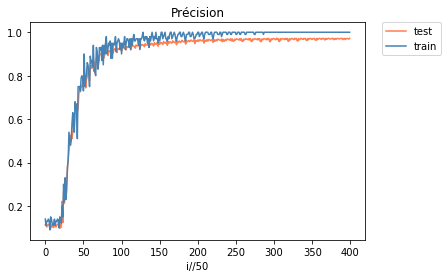

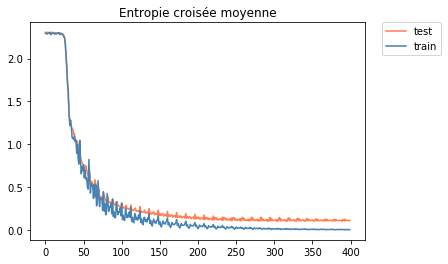

Best score for iteration 15150 	| Accuracy = 0.9724


In [20]:

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)


for i in range(20000):
    epoch = (i*100)//n_train + 1
    
    # Chargement d'un batch d'images et de réponses correctes correspondantes
    batch_train_X  = x_train[(i*100)%n_train:((i+1)*100)%n_train]
    batch_train_Y_ = y_train[(i*100)%n_train:((i+1)*100)%n_train]
    # Dictionnaire de données en entrée
    train_data = {X: batch_train_X, Y_: batch_train_Y_}

    # train
    sess.run(train_step, feed_dict=train_data)
    
    # Visualisation de la progression
    if not (i*100)%(n_train):
        print("Epoch : ", epoch)
    if not i%50:
        # Pour le batch d'entraînement
        acc, loss = sess.run([accuracy, cross_entropy], feed_dict=train_data)
        accuracy_train.append(acc)
        loss_train.append(loss/100)
        
        # Pour le test: évaluation sur tout l'ensemble des données
        #batch_test_X  = x_train[:n_test]
        #batch_test_Y_ = y_train[:n_test]
        test_data = {X: x_test, Y_: y_test}
        acc, loss = sess.run([accuracy, cross_entropy], feed_dict=test_data)
        accuracy_test.append(acc)
        loss_test.append(loss/n_test)
        if acc>accuracy_best:
            accuracy_best = acc
            i_best = i

# Représentation des résultats
# Précision
plt.plot(accuracy_test, c='coral', label='test')
plt.plot(accuracy_train, c='steelblue', label='train')
plt.xlabel('i//50')
plt.title('Précision')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
# Fonction de coût
plt.plot(loss_test, c='coral', label='test')
plt.plot(loss_train, c='steelblue', label='train')
plt.title('Entropie croisée moyenne')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
# Meilleur résultat sur un batch de test
print("Best score for iteration {} \t| Accuracy = {:.4f}".format(i_best, accuracy_best ))


Meilleure précision au bout de 10000 itérations: 96,15

In [21]:
sess.close()

Au bout de 34 époques précision de 97,24%!